### By analysing various algorithms on the various output the knn model is evaluation the correct .Hence we will use this in our app.py


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from textblob import TextBlob as tb
from autocorrect import Speller as sp
import emoji
import nltk
from nltk.tokenize import word_tokenize as wt,sent_tokenize as st
from nltk.corpus import stopwords
from nltk import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import FunctionTransformer,PowerTransformer,StandardScaler


from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,r2_score

ModuleNotFoundError: No module named 'textblob'

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 950.9 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from textblob import TextBlob as tb
from autocorrect import Speller as sp
import emoji
import nltk
from nltk.tokenize import word_tokenize as wt,sent_tokenize as st
from nltk.corpus import stopwords
from nltk import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import FunctionTransformer,PowerTransformer,StandardScaler


from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,r2_score

ModuleNotFoundError: No module named 'textblob'

In [5]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.7 MB/s eta 0:00:01
   ---- ---------------------------------- 71.7/626.3 kB 787.7 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/626.3 kB 901.1 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/626.3 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 1.3 MB/s 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from textblob import TextBlob as tb
from autocorrect import Speller as sp
import nltk
from nltk.tokenize import word_tokenize as wt,sent_tokenize as st
from nltk.corpus import stopwords
from nltk import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import FunctionTransformer,PowerTransformer,StandardScaler


from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,r2_score

In [2]:
data = pd.read_csv(r"D:\Innomatics Internship'\Assignments\Task sentiment analysis\dataset\data.csv")

In [3]:
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
data.drop_duplicates(keep="first", inplace=True)

In [5]:
data.drop(columns = ['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes', 'Down Votes', 'Month',], axis=1, inplace=True)
data.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(8510, 2)

In [8]:
data['sentiment'] = data['Ratings'].apply(lambda x: 1 if x >= 3 else 0)

In [9]:
data.head()

,Review text,Ratings,sentiment
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,1
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0


<Axes: xlabel='sentiment', ylabel='count'>

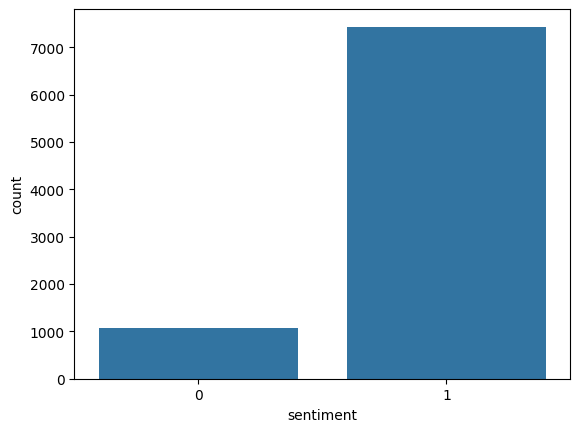

In [10]:
sns.countplot(x='sentiment', data=data)

In [11]:
X = data['Review text']
y = data['sentiment']

In [12]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets.
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382,) (6382,)
(2128,) (2128,)


In [27]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets.
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382,) (6382,)
(2128,) (2128,)


In [13]:
def pp(doc): # doc is a string of text
    # This text contains a lot of READ MORE tags.
    doc = doc.replace("READ MORE", " ")

    # Remove punctuation and numbers.
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
#     doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [14]:

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=pp)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 3.44 s
Wall time: 3.51 s
(6382, 2500)


In [18]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2128, 2500)


In [19]:
import mlflow
mlflow.set_experiment("Review_analysis")

<Experiment: artifact_location='file:///D:/Innomatics%20Internship%27/Assignments/Task%20sentiment%20analysis/mlruns/429812205071048563', creation_time=1711649974093, experiment_id='429812205071048563', last_update_time=1711649974093, lifecycle_stage='active', name='Review_analysis', tags={}>

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 4.51 ms


MultinomialNB()

In [21]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9359135067376998

In [22]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9130639097744361

In [23]:
%time X_train_clean = X_train.apply(lambda doc: pp(doc))

CPU times: total: 2.09 s
Wall time: 2.13 s


In [24]:

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV

In [25]:
from joblib import Memory

In [27]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory)
}
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'poly', 'rbf','sigmoid']

        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__p': [1, 2]

        }
    ]
}

In [26]:
%time X_test_clean = X_test.apply(lambda doc: pp(doc))

CPU times: total: 672 ms
Wall time: 712 ms


In [28]:
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 2.62 s
Wall time: 2.66 s
Score on Test Data:  0.9515326172386692
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 22.8 s
Wall time: 23.2 s
Score on Test Data:  0.9493207941483804
********** svc **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: total: 5min 34s
Wall time: 5min 46s
Score on Test Data:  0.9535732916014606
********** knn **********
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 8min 5s
Wall time: 2min 38s
Score on Test Data:  0.9504434011476265


In [29]:
import time
import joblib
import os

In [30]:
dev="a"
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
   # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test)
    end_predict_time = time.time()

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'{algo}.pkl')
    model_size = os.path.getsize(f'{algo}.pkl')

    # Pring Log
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    
    print()

    # Start the experiment run
    with mlflow.start_run() as run:
        # Log tags with mlflow.set_tag()
        mlflow.set_tag("developer", dev)

        # Log Parameters with mlflow.log_param()
        mlflow.log_param("algorithm", algo)
        mlflow.log_param("hyperparameter_grid", param_grids[algo])
        mlflow.log_param("best_hyperparameter", grid_search.best_params_)

        # Log Metrics with mlflow.log_metric()
        mlflow.log_metric("train_score", grid_search.best_score_)
        mlflow.log_metric("test_score", grid_search.score(X_test, y_test))
        mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
        mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
        mlflow.log_metric("model_size", model_size)

        # Log Model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Train Score:  0.94784325415821
Test Score:  0.9486248053969901
Fit Time:  3.4245855808258057
Predict Time:  0.015016794204711914
Model Size:  173159

********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Score:  0.9545782546568699
Test Score:  0.9609292502639915
Fit Time:  29.15575385093689
Predict Time:  0.015393733978271484
Model Size:  77741

********** svc **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train Score:  0.9616770778706465
Test Score:  0.9639568534596158
Fit Time:  502.9701864719391
Predict Time:  0.29677677154541016
Model Size:  481338

********** knn **********
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Score:  0.9545523472020685
Test Score:  0.9566805845511482
Fit Time:  212.09634828567505
Predict Time:  0.25762033462524414
Model Size:  665904

